# Section 2.1 — Discrete random variables

This notebook contains all the code examples from [Section 2.1 Discrete random variables](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch02_PROB.pdf#page=10) of the **No Bullshit Guide to Statistics**.

Topics covered in this notebook:

- Definitions of discrete random variables
- Examples of random variables
- Cumulative probability distribution
- Expectation calculations
- Computer models for random variables 
  - Overview of `scipy.stats` methods
- Real-world scenario involving probability calculations
- Discussion topics:
  - Bulk and tails of a distribution
  - Illustration of the *frequentist* interpretation of probability


#### Notebook setup

We'll start by importing the Python modules we need for this notebook.

In [1]:
import numpy as np               # numerical calculations
import matplotlib.pyplot as plt  # generic plotting functions
import seaborn as sns            # plotting distributions

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

In [3]:
# simple float __repr__
np.set_printoptions(legacy='1.25')

# set random seed for repeatability
np.random.seed(3)

## Definitions


### Random variables

- *random variable* $X$:
  a quantity that can take on different values
- *outcome*: a particular value $\{X = x\}$ or range of values $\{a \leq X \leq b\}$ that can occur as a result of observing the random variable $X$
- *sample space* $\mathcal{X}$: describes the set of all possible outcomes of the random variable.
- $f_X$: the *probability mass function*
  is a function that assigns probabilities to the different outcomes
  in the sample space of a discrete random variable.
  The probability mass function of the random variable $X$
  is a function of the form $f_X: \mathcal{X} \to [0,1]$.


#### Example 1: coin toss

Consider the random variable $C$ that describes the outcome of a coin toss for a balanced (fair) coin.
The sample space for the random variable $C$ is $\{\texttt{heads}, \texttt{tails}\}$.

The probability mass function is

$$
    f_C(\texttt{heads}) = 0.5
    \quad
    \textrm{and}
    \quad
    f_C(\texttt{tails}) = 0.5.
$$

The following code defines the Python function `fC` that corresponds to the 
probability mass function $f_C$ for the random variable $C$.

In [4]:
def fC(c):
    if c in ["heads", "tails"]:
        return 1/2
    else:
        return 0

In [5]:
fC("heads")

0.5

In [6]:
fC("tails")

0.5

Let's print the values of the probability mass function
for the two values in the sample space: `heads` and `tails`.

In [7]:
for c in ["heads", "tails"]:
    print("The probability of getting", c, "is", fC(c))

The probability of getting heads is 0.5
The probability of getting tails is 0.5


#### Example 2: rolling a six-sided die

The random outcome that occurs when we roll a six-sided die can be described as a random variable $D$
which has the sample space $\{1, 2, 3, 4, 5, 6\}$.
If we assume the die is fair,
then each of the outcomes will have equal weight,
so the probability mass function $f_D$ has the following values:

$$
    f_D(1)\!=\!\tfrac{1}{6},
    \ 
    f_D(2)\!=\!\tfrac{1}{6},
    \ 
    f_D(3)\!=\!\tfrac{1}{6},
    \ 
    f_D(4)\!=\!\tfrac{1}{6},
    \ 
    f_D(5)\!=\!\tfrac{1}{6},
    \ 
    f_D(6)\!=\!\tfrac{1}{6}.
$$

Let's define the probability mass function $f_D$ for the random variable $D$ as a Python function ...

In [8]:
def fD(d):
    if d in [1,2,3,4,5,6]:
        return 1/6
    else:
        return 0

... and print the values of `fD` for all individual outcomes in the sample space $\{1,2,3,4,5,6\}$:

In [9]:
for d in range(1,6+1):
    print("The probability of rolling a", d, "is", fD(d))

The probability of rolling a 1 is 0.16666666666666666
The probability of rolling a 2 is 0.16666666666666666
The probability of rolling a 3 is 0.16666666666666666
The probability of rolling a 4 is 0.16666666666666666
The probability of rolling a 5 is 0.16666666666666666
The probability of rolling a 6 is 0.16666666666666666


Note the Python function `range(a,b)` is equivalent to the list of values `[a,a+1,a+2,...,b-1]`,
which does not include the upper limit `b`.
If we want to have a range of values that includes `b` we use
`range(a,b+1)` which produces `[a,a+1,a+2,...,b-1,b]`.
You'll see this `+1` added in code examples
whenever we use the Python function `range` to iterate over a list of values.

#### Example 3: hard disk failures

We can model the number of hard disk failures expected to occur in a given data centre as a random variable $H$ distributed according to the Poisson model.
The probability mass function of the Poisson distribution is described by the following equation:

$$
    f_H(h) = \frac{\lambda^{h}e^{-\lambda }}{h!}, \ \ \textrm{for }  h \in \{0, 1, 2, 3, \ldots \},
$$

where $\lambda$ is a parameter of the distribution.

In this example, we know parameter is $\lambda = 20$,
which we'll denote as `lam = 20` in Python.

The probability mass function for the random variable $H \sim \textrm{Pois}(\lambda=20)$ is computed using the following Python function `fH`.

In [10]:
import numpy as np
import math

def fH(h):
    lam = 20
    return lam**h * np.exp(-lam) / math.factorial(h)

The code above uses the function `np.exp` from the NumPy module to do the $e^x$ calculation,
and `math.factorial` for the $n!$ calculation.

We can use the function `fH` to compute the probability of simple outcomes like $\{H=23\}$,
the probability of getting exactly 23 hard disc failures in a month.

In [11]:
fH(23)

0.06688147366240181

The probability of an event is the sum of the probabilities of the individual outcomes.
To compute the probability of the event $\{18 \leq H \leq 22\}$,
we must find the probability of getting either 18, 19, 20, 21, and 22 hard disk failures,
and sum together the probabilities of the individual outcomes,
to find the the probability of the event.

In [12]:
probs = []
for h in range(18,22+1):
    prob = fH(h)
    probs.append(prob)

sum(probs)

0.42358294520135187

We can write the above steps more succinctly
and find the event in a single line of code
using python's list-comprehension syntax:

In [13]:
sum([fH(h) for h in range(18,22+1)])

0.42358294520135187

The code below verifies that the Python function `fH` satisfies Kolmogorov's second axiom,
which demands that the total probability must be one:
$\sum_{h=0}^{h=\infty} f_H(h) = 1$.

In [14]:
sum([fH(h) for h in range(0,100+1)])

1.0

Note we calculated the summation only until $h=100$ and not until $h=\infty$.
In general,
it's it's not possible to do summation until infinity on computers.
Stopping the summation at $h=100$ is okay in this case,
because the probability values $f_H(101)$, $f_H(102)$, etc. are very small numbers,
`fH(101) = 5.544e-38` which is a negligible number,
when added to the answer `1.0`.

In [15]:
1.0 + fH(101)

1.0

**Plotting the probability mass function**

We use the `stem` plot from the Matplotlib library to plot the probability mass functions of discrete random variables.
To create a stem-plot of the probability mass function $f_H$,
we follow a three-step procedure:

1. Create a range of inputs `hs` for the plot.
2. Compute the value of $f_H$ for each of the inputs and store as list of values `fHs`.
3. Plot the values `fHs` by calling the function `plt.stem`.

We'll use this three-step procedure whenever we want to generate plots in Python.
For more details about this,
check out the section "Plotting function graphs" in the [Python tutorial notebook](../tutorials/python_tutorial.ipynb),
which whos other examples.

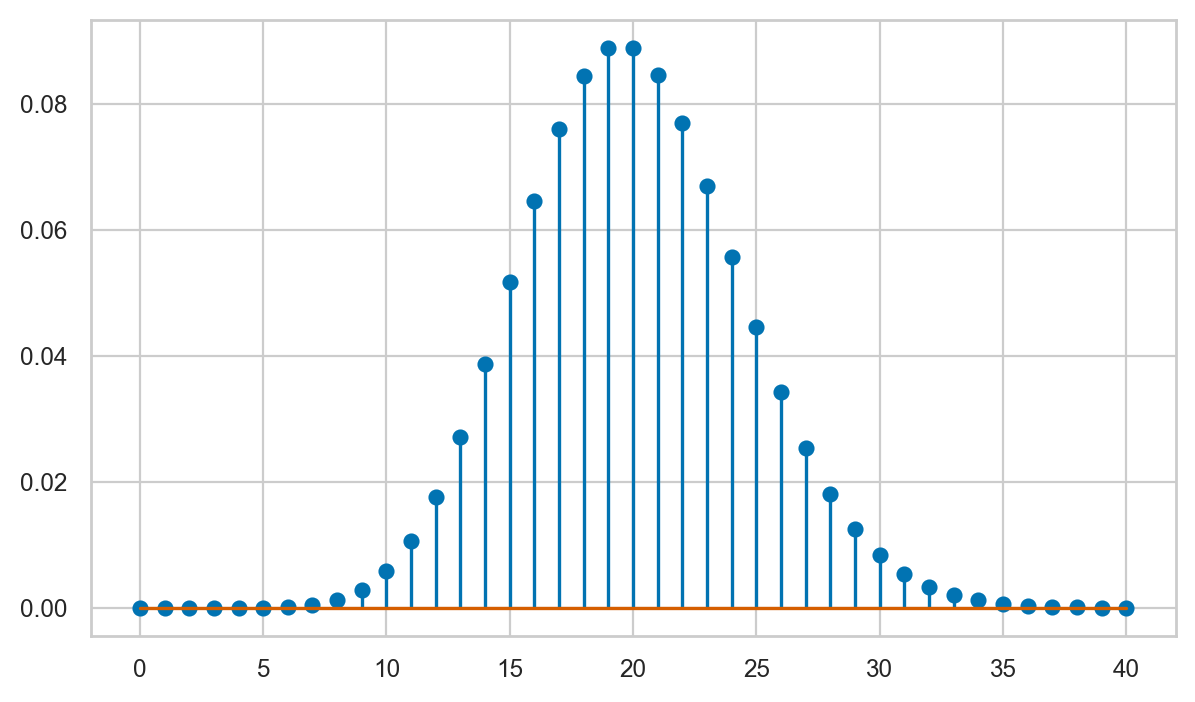

In [16]:
# 1. create a list of input values = the range of outcomes we want to show in the plot
hs = range(0, 40+1)

# 2. compute fH(h) for each h in the list inputs = the probabilities for each outcome
fHs = [fH(h) for h in hs]

# 3. create the stem plot
plt.stem(hs, fHs);

Note the graph of the probability mass function corresponds to a discrete set of points,
and is not defined for values in between the integers.
This makes sense,
since we can't have 20.3 hard disk failures—only integers are allowed.

## Cumulative distribution function and its inverse

We'll now discuss two other functions associated with a random variable $X$,
which are obtained from its probability mass function $f_X$.

### Cumulative distribution function

The *cumulative distribution function* $F_X$ of the random variable $X$
describes the probability of outcomes that are smaller than or equal to some value $b$:

$$
   F_X(b) = \textrm{Pr}(\{X \leq b\}).
$$

The cumulative distribution function is often abbreviated as CDF.

For example,
the cumulative distribution function of the random variable $H$ is given by:

$$
   F_H(b) = \textrm{Pr}(\{H \leq b\}) = \sum_{h=0}^{h=b} f_H(h).
$$

The code below compute the CDF using a summation.

In [17]:
def FH(b):
    intb = int(b)
    return sum([fH(h) for h in range(0,intb+1)])

Evaluating the function $F_H(21) =$ `FH(21)` ...

In [18]:
FH(21)

0.6436976484142636

... is equivalent to computing the summation $\sum_{h=0}^{h=21} f_H(h)$.

In [19]:
sum([fH(h) for h in range(0,21+1)])

0.6436976484142636

The cumulative distribution function is defined for non-integer values,
with it's value staying constant for all fractional values all the way until the next integers value:

$$
  F_H(21) = F_H(21.1) = F_H(21.9) = F_H(21.9999).
$$

In [20]:
FH(21), FH(21.1), FH(21.9), FH(21.9999)

(0.6436976484142636,
 0.6436976484142636,
 0.6436976484142636,
 0.6436976484142636)

#### Plotting the cumulative distribution function

We can use the Seaborn function `lineplot` to plot the graph of the function $F_H$.
Recall the three-step procedure we use when plotting functions in Python:

1. Create a range of inputs `hs` for the plot.  
   For this plot, we'll use a continuous range of inputs obtained from the NumPy `linspace` function.
2. Compute the value of $F_H =$ `FH` for each of the inputs and store the results as list of values `FHs`.
3. Plot the values `FHs` by calling the `sns.lineplot`.

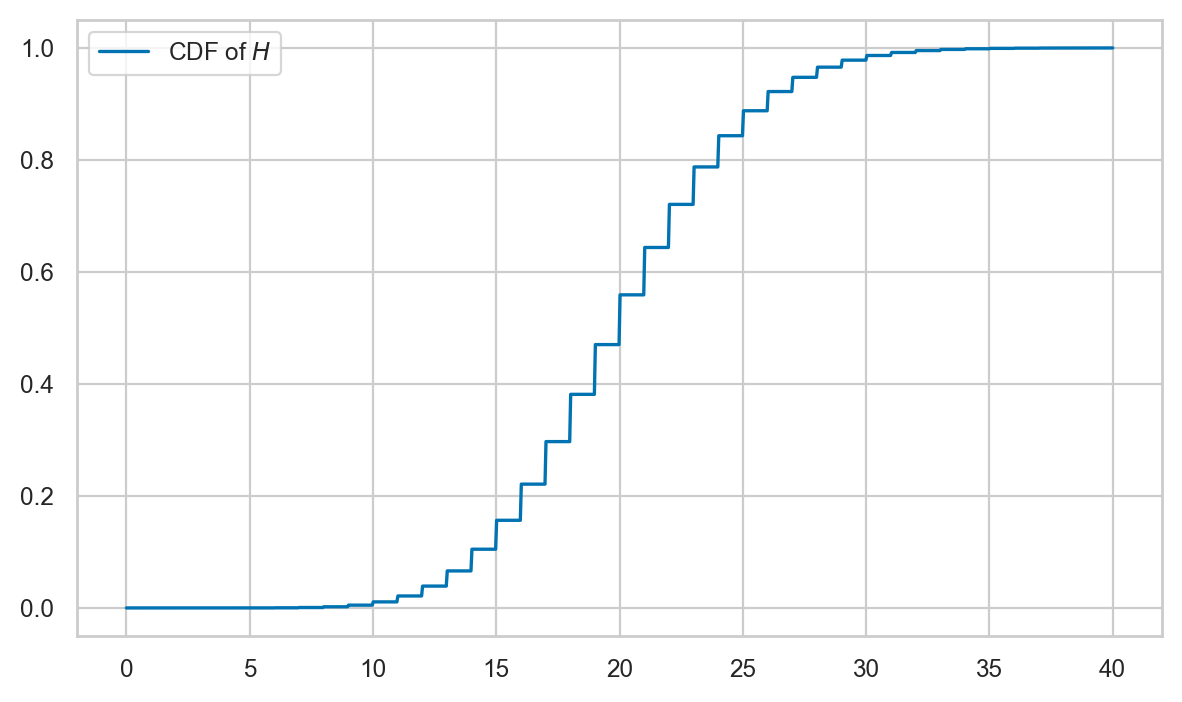

In [21]:
hs = np.linspace(0, 40, 1000)
FHs = [FH(h) for h in hs]
sns.lineplot(x=hs, y=FHs, label="CDF of $H$");

### Inverse of the cumulative distribution function

The *inverse cumulative distribution function* (inverse-CDF) $F^{-1}_X$
tells us the positions of the quantiles of the random variable $X$.
The value $F_X^{-1}(q)=x_q$ tells how far you need to go in the sample space
so that the outcome $\{ X \leq x_q \}$ contains at least proportion $q$
of the total probability: $F_X(x_q) \geq q$.

The code below shows how to calculate the inverse of the cumulative distribution function $F_H^{-1}(q)$ for the random variable $H$, by searching for the first value $b$ that satisfies the requirement $F_H(b) \geq q$.

In [22]:
def invFH(q):
    for b in range(0, 200):
        if FH(b) >= q:
            return b

For example, let's compute $F^{-1}_X(0.5)$ (the median of $H$):

In [23]:
invFH(0.5)

20

We can check this answer by computing the value of the cumulative distribution function $F_H(20)$,
and verifying that it is indeed greater than $0.5$.

In [24]:
FH(20)

0.5590925842313252

#### Plotting the inverse-CDF


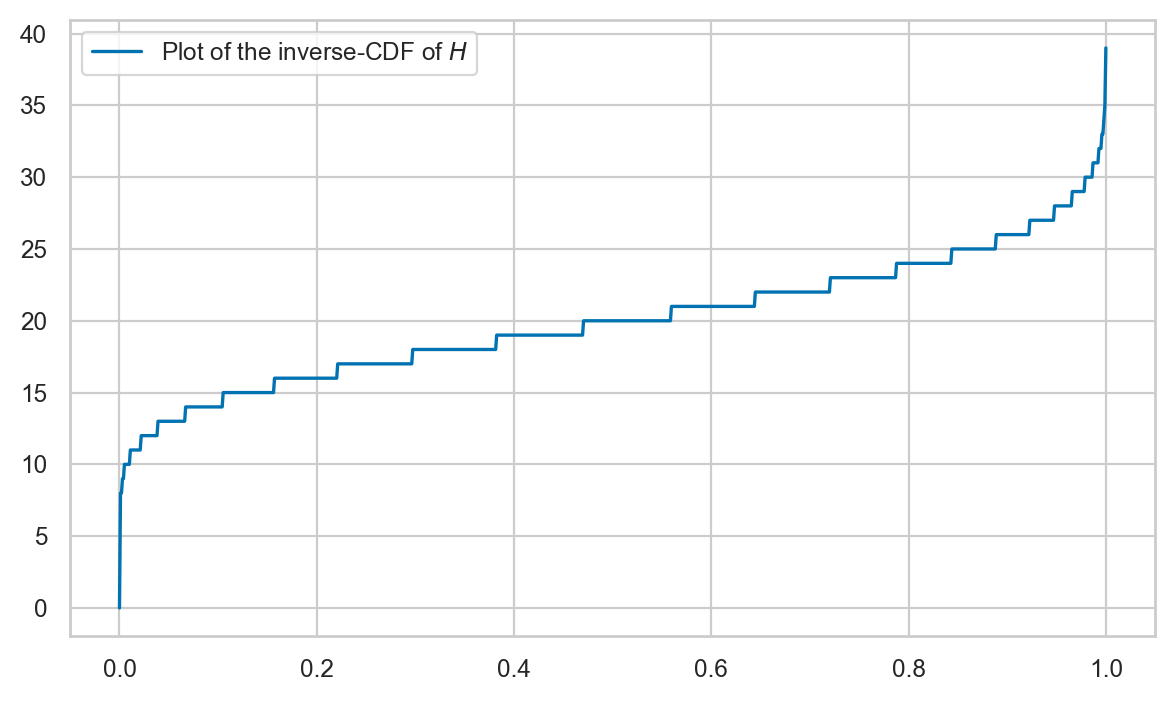

In [25]:
qs = np.linspace(0, 0.9999, 1000)
invFHs = [invFH(q) for q in qs]
sns.lineplot(x=qs, y=invFHs, label="Plot of the inverse-CDF of $H$");

Note the graph of the inverse-CDF $F_H^{-1}$ corresponds to a flipped version of the graph of the CDF $F_H$.
Indeed, $F_H$ and $F_H^{-1}$ contain the same information.

## Expectation calculations


### Definitions

Suppose we're interested in calculating some value $w(X)$,
which depends on the random variable $X$.
The function $w \colon \mathcal{X} \to \mathbb{R}$
assigns different "winning" amounts to the different outcomes of the random variable $X$.

The *expected value* of $w(X)$ is obtained by computing the average of $w(X)$
over all the possible outcomes $x$ of the random variable $X$:

$$
    \mathbb{E}_X[w(X)] = \sum_{x \in \mathcal{X}} w(x)f_X(x).
$$

The math shorthand symbol $\mathbb{E}_X$ describes the expected value of a quantity that depends on the random variable $X$.

#### Example 4: expected winnings from the die game


Consider the game of chance with a six-sided die
that costs $\$1$ to play per round.
You win $\$5$ if you roll a ${6}$
and you win nothing if you roll any other number.
In other words,
the winnings function $w$ for this game is

$$
    w({1}) = w({2}) = w({3}) = w({4}) = w({5}) = \$0	\quad \textrm{and} \quad 	w({6}) = \$5.
$$

Let's encode encode this winning (payout) as a Python function.

In [26]:
def w(d):
    if d == 6:
        return 5
    else:
        return 0

The expected value of $w(D)$ is computed as follows:

In [27]:
sum([w(d)*fD(d) for d in range(1,6+1)])

0.8333333333333333

### Measures of centre and dispersion

The mean of the discrete random variable $X$ with probability mass function $f_X$ is defined as:

$$
    \mu_X = \mathbb{E}_X[X] = \sum_{x \in \mathcal{X}}  x \cdot f_{X}(x).
$$


The variance of a discrete random variable is defined as follows:

$$
    \sigma_X^2
    =
    \mathbb{E}_X[(X-\mu_X)^2]
    =
    \sum_{x \in \mathcal{X}}  (X-\mu_X)^2 \cdot f_{X}(x).
$$

The variance formula calculates the average squared distance of the outcomes from the mean,
which is a measure of the dispersion of the distribution.


#### Example 5: mean and variance of six-sided die


The formula for the mean of $D$ is given by:

$$
  \mu_D \ = \ \mathbb{E}_D[D] = \sum_{d=1}^{d=6}  d \cdot f_{D}(d).
$$

In code, this gives:

In [28]:
sum([d*fD(d) for d in range(1,6+1)])

3.5

So the mean of the random variable $D$ is $\mu_D = \frac{21}{6} = 3.5$.

The formula for the variance of $D$ is

$$
    \sigma_D^2
        = \mathbb{E}_D\!\left[ (D-\mu_D)^2 \right]
        = \sum_{d=1}^{d=6} \; (d-3.5)^2 \cdot f_D(d).
$$

In [29]:
sum([(d-3.5)**2 * fD(d) for d in range(1,6+1)])

2.9166666666666665

So the variance of $D$ is $\sigma_D^2 = 2.91\overline{6}$.

We can compute the standard deviation $\sigma_D$ by taking the square root of the variance.

In [30]:
import numpy as np
np.sqrt(2.9166666666666665)

1.707825127659933

#### Example 6: mean and variance of hard disks failures


The formula for the mean of $H$ is given by:

$$
  \mu_H \ = \ \mathbb{E}_H[H] = \sum_{h=0}^{h=\infty}  h \cdot f_{H}(h).
$$

In code, we'll use the upper limit of $h=100$ instead of $h=\infty$ since the answer is the same (values $h\cdot f_H(h)$ for $h \geq 101$ are negligibly small).

In [31]:
sum([h*fH(h) for h in range(0,100+1)])

20.0

So the mean of the random variable $H$ is $\mu_H = 20.0$.
Indeed, this is what we expect since we constructed this random variable with parameter $\lambda=20$.

The formula for the variance of $H$ is

$$
    \sigma_H^2
        = \mathbb{E}_H\!\left[ (H-\mu_H)^2 \right]
        = \sum_{h=0}^{h=\infty} (h-20)^2 \cdot f_H(h).
$$

In [32]:
sum([(h-20)**2 * fH(h) for h in range(0,100)])

19.999999999999996

Due to numerical rounding errors in the above computation, we end up with a number that differs (in the 15th decimal) from the correct answer $20$.
The variance of $H$ is $\sigma_H^2 = 20.0$.

We can compute the standard deviation $\sigma_H$ by taking the square root of the variance.

In [33]:
import numpy as np
np.sqrt(20)

4.47213595499958

Intuitively,
the standard deviation $\sigma_H$ tells us the width of the distribution is approximately 5,
and the most likely outcomes will be in the interval
$[\mu_H - \sigma_H, \mu_H + \sigma_H] = [15, 25]$.

<a name="computer_models"></a>

## Computer models for random variables

We saw in the above examples how to define Python functions `fC`, `fD`, `fH`,
which correspond to the probability mass functions $f_C$, $f_D$, $f_H$ of the random variables $C$, $D$, $H$.
But we don't have to create all our computer models by ourselves!
The Python module `scipy.stats` contains pre-defined code for all the probability distributions that we'll use in this book.

Here is the general terminology we use initializing on of these pre-defined models:

- `<model>`: the family of probability distributions
  - Examples: `randint`, `poisson`, `norm`, etc.,
    which we import from `scipy.stats`.
- `<params>`: parameters of the model—specific value of the control knobs we choose to create a particular distribution:
  - Examples: `alpha`, `beta`, `lam`, `mu`, `sigma`, etc.
- `<model>(<params>)`: the probability model from the family `<model>` initialized with parameters `<params>`
  - Examples: `randint(1,6+1)`, `poisson(20)`, `normal(10,3)`


The math shorthand symbol "$\sim$" stands for "is distributed according to."
For example,
$X \sim \mathcal{M}(\theta)$ means the random variable $X$
is distributed according to the probability model $\mathcal{M}$ with parameters $\theta$.


### Examples of probability models and their computer implementations

- The discrete uniform family of distribution $\mathcal{U}_d(\alpha,\beta)$
  assigns equal probabilities to all outcomes in the range $[\alpha, \alpha+1, \ldots, \beta]$.
  To create a computer model for a discrete uniform distribution,
  use the code `randint(alpha,beta+1)`,
  where `alpha` and `beta` are two integers.
  - Examples 2: we can model the outcome of a six-sided die roll $D \sim \mathcal{U}_d(1,6)$ as `rvD = randint(1,6+1)`.
- The Poisson family of distribution $\textrm{Pois}(\lambda)$
  describes the count of occurrences when the average rate is $\lambda$.
  To create a computer model for a Poisson random variable
  use the code `poisson(lam)`,
  where `lam` (short for *lambda*) describes the average number of occurrences.
  - Examples 3: we can represent the number of hard disk failures $H \sim \textrm{Pois}(20)$ using the computer model `rvH = poisson(20)`.
- The normal family of distribution $\mathcal{N}(\mu,\sigma)$ corresponds to
  a bell-shaped curve centred at $\mu$ whose width is proportional to $\sigma$.
  To create a computer model for a normal random variable $\mathcal{N}(\mu,\sigma)$,
  use the code `norm(mu,sigma)`,
  where `mu` = $\mu$ is the mean and `sigma` = $\sigma$ is the standard deviation.


In [34]:
# # BONUS: see all attributes and methods:
# [attr for attr in dir(rvH) if "__" not in attr] 

TODO: table of methods

## Hard disks example

Let's now look at a a real-world scenario in which we'll use the computer model for the Poisson variable to do all kinds of computations with relevance to the real-world.

The first thing we'll do is import the `poisson` model from `scipy.stats`:

In [35]:
from scipy.stats import poisson

Next,
create a random variable object `rvH` by initializing the Poisson model with parameter $\lambda = 20$.

In [36]:
rvH = poisson(20)

The methods on the random variable object `rvH`  allow us to do anything we might want to do with the random variable $H$, as we'll now see below...

### Compute probabilities of simple outcomes

To compute the value of $f_H$,
we simply call the `pmf` method on the random variable object `rvH`.

In [37]:
rvH.pmf(20)

0.0888353173920848

In [38]:
rvH.pmf(21)

0.0846050641829373

In [39]:
rvH.pmf(22)

0.07691369471176195

### Properties of the distribution

The mean $\mu_H$ of the distribution is obtained using:

In [40]:
rvH.mean()

20.0

The standard deviation $\sigma_H$ is obtained using:

In [41]:
rvH.std()

4.47213595499958

Alternatively,
we can compute the standard deviation $\sigma_H$ by taking the square root of the variance:

In [42]:
np.sqrt( rvH.var() )

4.47213595499958

The median of the distribution is the position of the $q=0.5$ quantile, $F_H^{-1}\big(\frac{1}{2}\big)$:

In [43]:
rvH.median()

20.0

The sample space the random variable is described by:

In [44]:
rvH.support()

(0, inf)

The concept of *support* (of a probability distribution) is a fancy math way to talk about "the interval of values where the probability distribution is non-zero." The above result tells us the support of the random variable `rvH` is all integers between $0$ and $\infty$.

### Computing probabilities of events

Suppose you want to compute the probability of the event $\{ a \leq N \leq b \}$
for the random variable $H$.

For example,

$$
  \textrm{Pr}(\{15 \leq H \leq 25\}) = \sum_{h=15}^{h=25} f_H(h),
$$

is the sum of `f_H` between 15 and 25:

In [45]:
sum([rvH.pmf(x) for x in range(15, 25+1)])

0.7829507461740415

An alternative approach 

$$
  \textrm{Pr}(\{15 \leq H \leq 25\}) = F_H(25) - F_H(15-1).
$$


In [46]:
rvH.cdf(25) - rvH.cdf(15-1)

0.7829507461740454

### Plotting the probability mass function

Let's create a `stem` plot of the probability mass function $f_H$.
Recall the three-step procedure for plotting:

1. Create a range of inputs `hs` for the plot.
2. Compute the value of $f_H$ for the `hs` inputs and store result in an array `fHs`.
3. Plot the `fHs` values using `plt.stem`.

Instead of using ordinary list of values as we did previously,
we'll use the NumPy arrays for the calculations,
which are much more efficient.

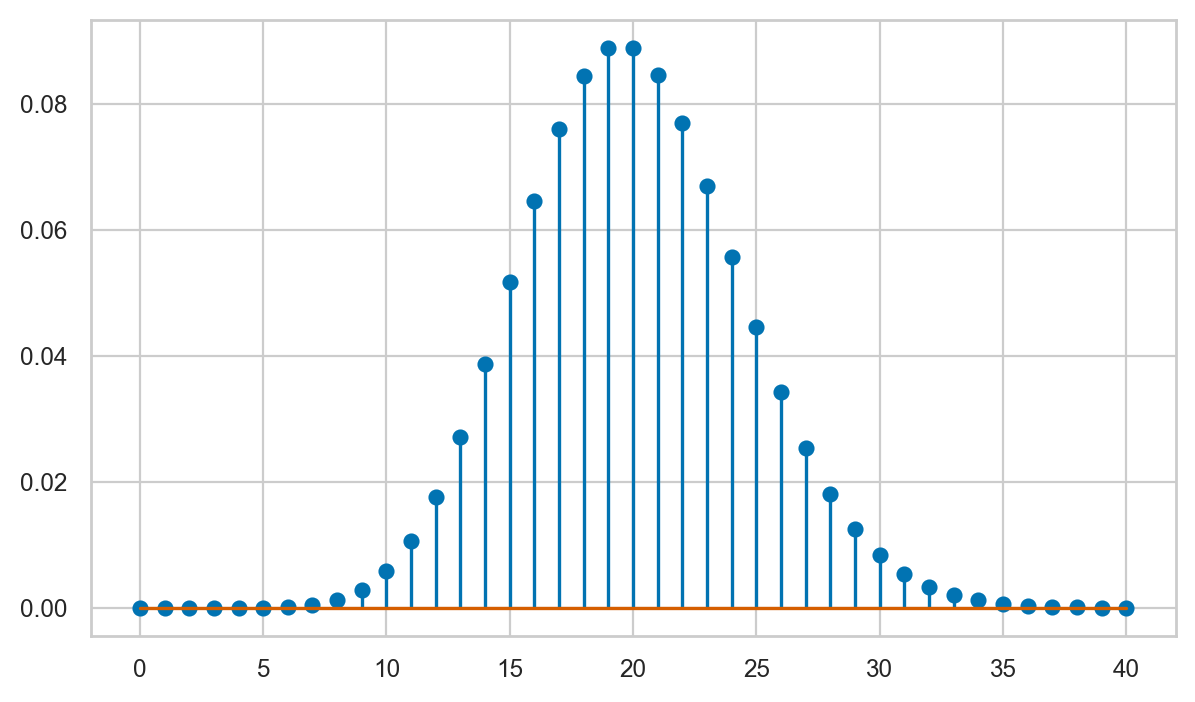

In [47]:
import numpy as np

# 1. array of input values for the plot
hs = range(0, 40+1)

# 2. compute f_H for the array of inputs `hs`
fHs = rvH.pmf(hs)

# 3. create the stem plot
plt.stem(hs, fHs);

Some comments on the code we used to produce graph:

1. The command `range(a,b+1)` produces a `list` of inputs from `a` until `b`.
2. Note we call the method `rvH.pmf` with the entire list of inputs,
   and `rvH.pmf` computes the outputs for each element in the list in one step.
   This is a common pattern in scientific computing:
   most of the functions in NumPy and SciPy can be called with `array` inputs (vectors)
   and return `array` outputs,
   which makes them very efficient when doing large-scale calculations
   (e.g. computations with millions of inputs).

The helper method `plot_pmf` defined in the `ministats` module
can also be used to generate this graph.
To use it,
just pass any random variable object as input,
and the function will figure out an appropriate settings for the plot.

In [48]:
%pip install -q ministats


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


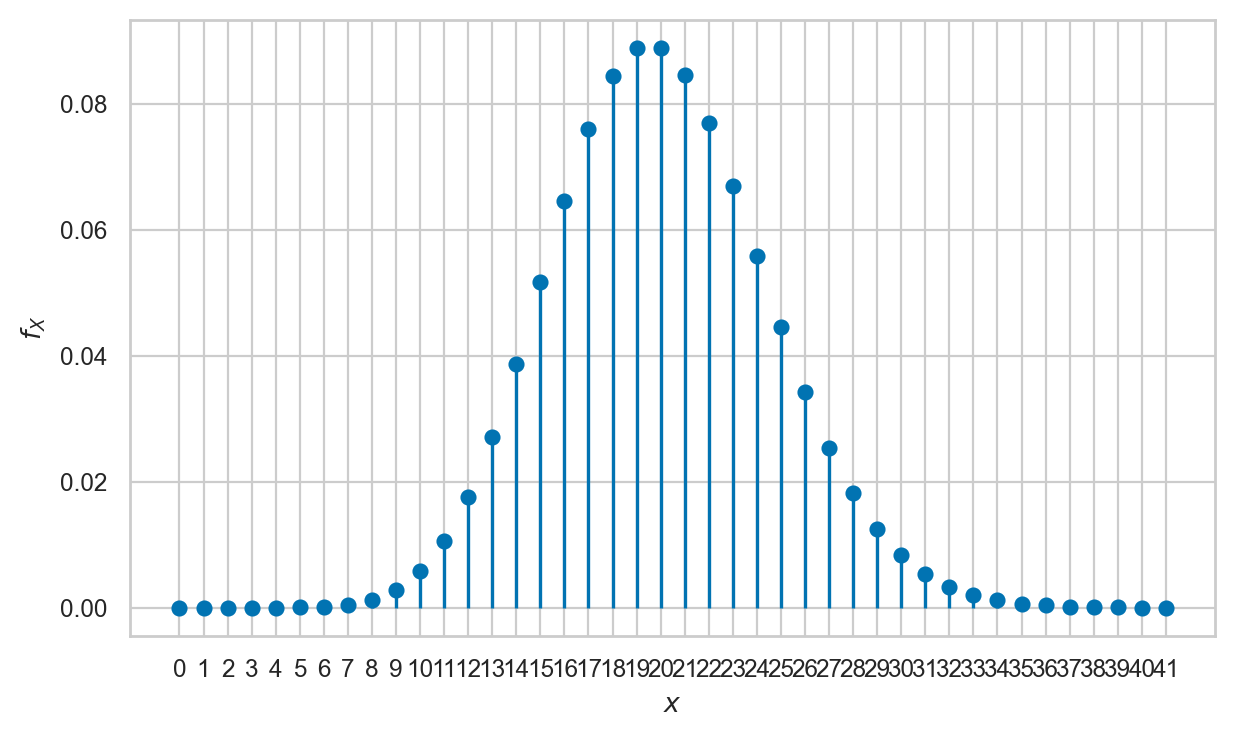

In [49]:
# import the `plot_pmf` helper function from the `ministats` module
from ministats import plot_pmf

plot_pmf(rvH);

You can control the resulting plot by passing optional arguments like `xlims`, `ylims`, `rv_name` (default to X), etc. Type in `help(plot_pmf)` so learn about all these options.

### Computing quantiles

Recall the inverse cumulative distribution function $F^{-1}_X$,
which tells us the positions of the quantiles of the random variable $X$.
The value $F_X^{-1}(q)=x_q$ tells the smallest $x_q$ such that $F_X(x_q) \geq q$.
We use the method `rvH.ppf(q)` (short for *percentile point function*)
to obtain values of inverse-CDF.

Let's try to find the smallest interval $[0, h_q]$ that contains at least proportion $q$ of the total probability.
For example, the $q=0.95$ quantile corresponds to the value $h$ such that $\textrm{Pr}(\{H \leq h\}) \geq 0.95$.

In [50]:
rvH.ppf(0.95)

28.0

We can verify that answer is correct by computing $\textrm{Pr}(\{H \leq 28\}) = F_H(28)$:

In [51]:
rvH.cdf(28)

0.9656664781059899

Note by choosing $h=28$ we're overshooting the target 0.95 a little bit.
This is often the case when calling the `ppf` methods of discrete random variables.
The previous value at $h=27$ gives `rvH.cdf(27)` $=F_H(27) = 0.9475$,
which is less than 0.95, so we pick $h=28$ as the smallest value that satisfies $F_H(h) \geq 0.95$.

### Generating random observations

Let's say you want to generate $n=12$ observations from the random variable $H$.
You can do this by calling the method `rvH.rvs(12)`.

In [52]:
np.random.seed(42)

rvH.rvs(12)

array([23, 15, 21, 25, 15, 17, 19, 21, 17, 19, 16, 21])

If you rerun the above code cell another time,
you'll see 12 different numbers.
This is the whole point of the `rvs` method (*random variates* generator):
each time you call it, you'll see a different set of observations.

### Computing expectations

Let's say we want to estimate of the total cost we should budget for replacement hard disks, given a base price of \\$200/disk and a bulk discount of \\$150/disk when buying 20 or more disks.

The replacement cost for `h` disks is described by the following Python function.

In [53]:
def cost(h):
    if h >= 20:
        return 150*h
    else:
        return 200*h

To calculate the expected cost of replacement disks,
we compute the `sum` of `cost(h)*h` for all possible outcomes `h`.

In [54]:
sum([cost(h)*rvH.pmf(h) for h in range(0,100+1)])

3381.421949447139

Another option for computing the expected value is to use the method `rvH.expect()`.
If we try calling `rvH.expect(cost)`,
we'll get an error "*ValueError: The truth value of an array with more than one element is ambiguous.*"

This error occurs because the Python function `w` chokes
if we pass it an `array` of inputs to evaluate,
which is what the method `rvD.expect` does (for efficiency reasons).

In [55]:
# doesn't work!
# rvH.expect(cost)

We can easily solve this by "vectorizing" the function using the NumPy helper method `vectorize`,
which makes any Python function work with vector inputs (arrays of numbers).
The code below shows how to convert the function `cost`
to a vector-friendly equivalent function `vcost`,
which we can ten use in the `rvH.expect` method.

In [56]:
vcost = np.vectorize(cost)
rvH.expect(vcost)

3381.42194944714

### Additional visualizations (bonus topic)

We already saw how to plot the probability mass function $f_H$ above,
but what about plotting cumulative distribution function $F_H$ and its inverse $F_H^{-1}$?

#### Plotting the cumulative distribution function

The cumulative distribution function $F_H(b) =$ `rvH.cdf(b)` is a continuous function (defined for all inputs $b$), so we can use the Seaborn function `lineplot` to graph it.

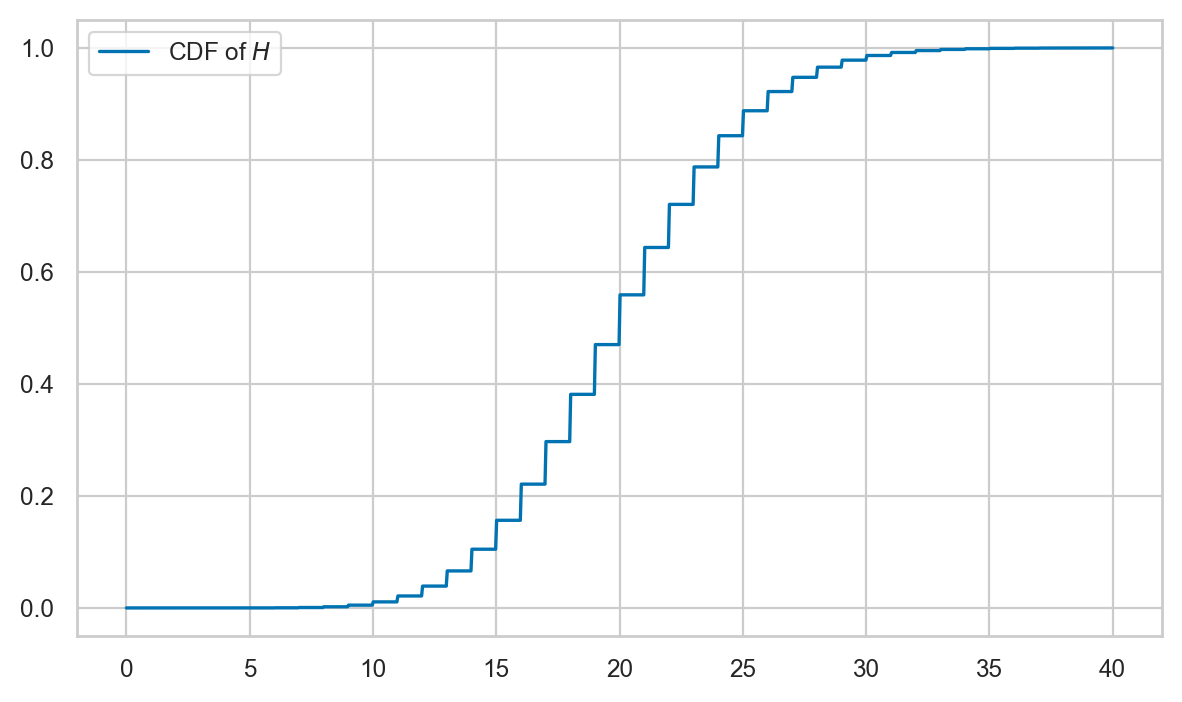

In [57]:
hs = np.linspace(0, 40, 1000)
FHs = rvH.cdf(hs)
sns.lineplot(x=hs, y=FHs, label="CDF of $H$");

#### Plotting the inverse of the cumulative distribution function

The inverse of the cumulative distribution $F_H^{-1}(q) =$ `rvH.ppf(q)` is a also a continuous function,
so we'll use a similar approach as for the CDF.

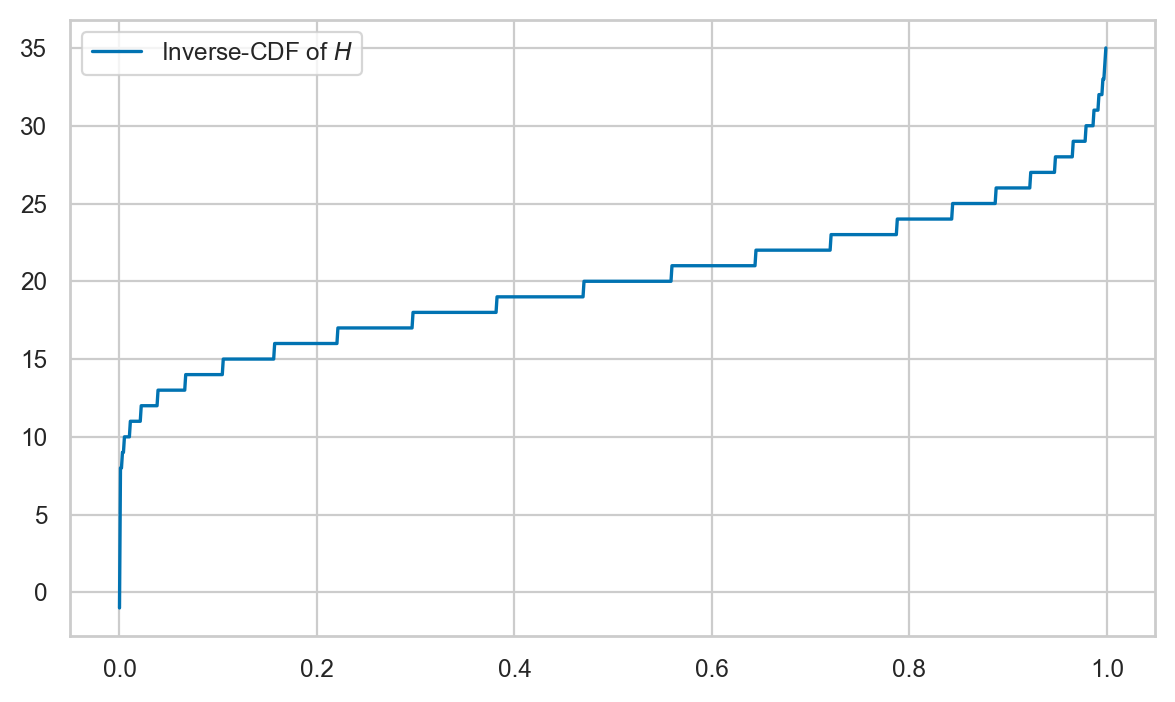

In [58]:
qs = np.linspace(0, 1, 1000)
invFHs = rvH.ppf(qs)
sns.lineplot(x=qs, y=invFHs, label="Inverse-CDF of $H$");

## Discussion

### Bulk of the distribution

We want to find an interval $[a,b]$ (a subset of the sample space $\mathcal{H}$)
that contains the most likely observations of the random variable $H$.
Recall the math interval notation $[a,b]$ describes all numbers between $a$ and $b$,
including the endpoints $a$ and $b$.
Specifically,
we'll find an interval that contains the middle 95% of the observations of the random variable $H$,
which means we're looking for the integers `a` and `b` such that:

$$
   \textrm{Pr}(\{a \leq H \leq b\})
   = \sum_{h=a}^{h=b} f_H(h)
   = f_H(a) + f_H(a+1) + \cdots + f_H(b) \geq 0.95. 
$$

We can obtain this upper and lower limits by calling the `ppf` method on the `rvH` object.

In [59]:
a = rvH.ppf(0.025)
b = rvH.ppf(0.975)
[a, b]

[12.0, 29.0]

The logic is as follows: if we want the interval to contain the middle 0.95 of the probability,
we can split the remaining 0.05 into left and right "tails" accounting for 0.025 of the probability each.

- We can obtain the left-boundary of the interval from the value $F_X^{-1}(0.025)$,
  which reports the interval $[0,a]$ that contains at least 0.025 of the probability.
- To find the right boundary `b` we compute the value $F_X^{-1}(0.975)$.

We'll convert the limits to integers,
so we can use them in summation calculations.

In [60]:
a = int(a)  # left boundary `a` as an integer
b = int(b)  # right boundary `b` as an integer
[a,b]

[12, 29]

The interval $[a,b]$ should contain at least 0.95 of the probability (the bulk of the distribution).
Let's verify this by computing the sum of $f_H$ for all the values in that interval: $f_H(a) + f_H(a+1) + \cdots + f_H(b)$.

In [61]:
sum([rvH.pmf(h) for h in range(a,b+1)])

0.9567949608871579

Another way to verify that the interval $[a,b]$ contains 95% of the probability
is to use the cumulative distribution function $F_H =$ `rvH.cdf`, since

$$
   \textrm{Pr}(\{a \leq H \leq b\})
   = F_H(b) - F_H(a-1).
$$

In [62]:
rvH.cdf(b) - rvH.cdf(a-1)

0.9567949608871623

#### Visualizing the interval $[a,b]$

The code below generates a stem plot for the subset of $f_H$ values within the interval $[a,b]$.

The bulk of the distibution:


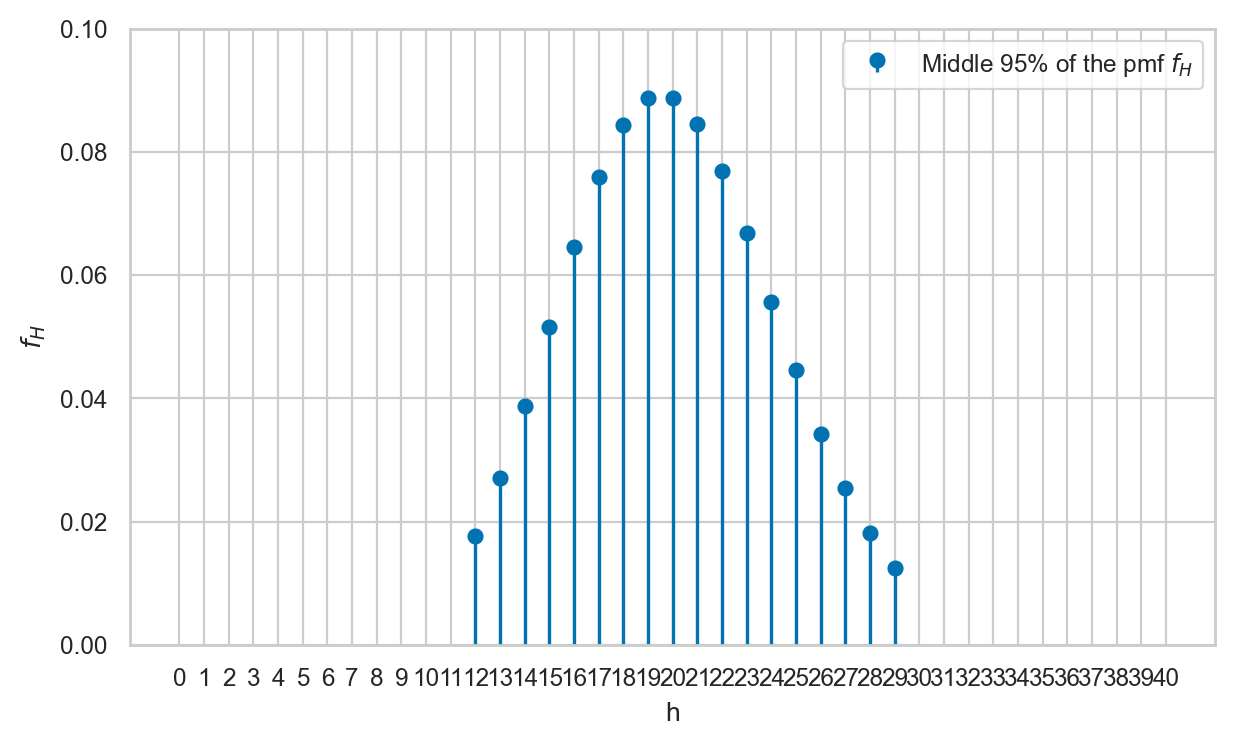

In [63]:
hs = np.arange(0, 40+1)
fHs = rvH.pmf(hs)

# Remove values that are smaller than `a` or greater than `b`
fHs[0:a] = np.nan
fHs[b+1:] = np.nan

fig, ax = plt.subplots()
ax.stem(fHs, label="Middle 95% of the pmf $f_H$", basefmt=" ")
ax.set_xlabel('h')
ax.set_ylabel('$f_H$')
ax.set_ylim([0, 0.1])
ax.legend()
plt.xticks(hs)
print("The bulk of the distibution:")

### Tails of the distribution

Conversely,
the "tails" of the distribution contain the unlikely outcomes for the random variable.
The complement of the interval `[a,b]` contains at most 5% of the probability.

#### Left tail

The left tail of the distribution $f_H$ is the interval `[0,a-1]`,
which contains less than 2.5% of the probability.

In [64]:
sum([rvH.pmf(h) for h in range(0,(a-1)+1)])

0.021386821587280218

#### Right tail

The right tail of the distribution $f_H$ is the interval `[b+1,np.inf]`,
which contains less than 2.5% of the probability.

In [65]:
sum([rvH.pmf(h) for h in range(b+1,1000)])

0.021818217525557397

We can verify the combined weight of the two tails is less than 5%.

In [66]:
sum([rvH.pmf(h) for h in range(0,(a-1)+1)]) \
  + sum([rvH.pmf(h) for h in range(b+1,1000)])

0.043205039112837615

#### Visualizing the tails of the distribution

The code below generates a stem plot for tails of the distribution $f_H$,
which consists of values outside the interval `I_95`.

The tails of the distibution:


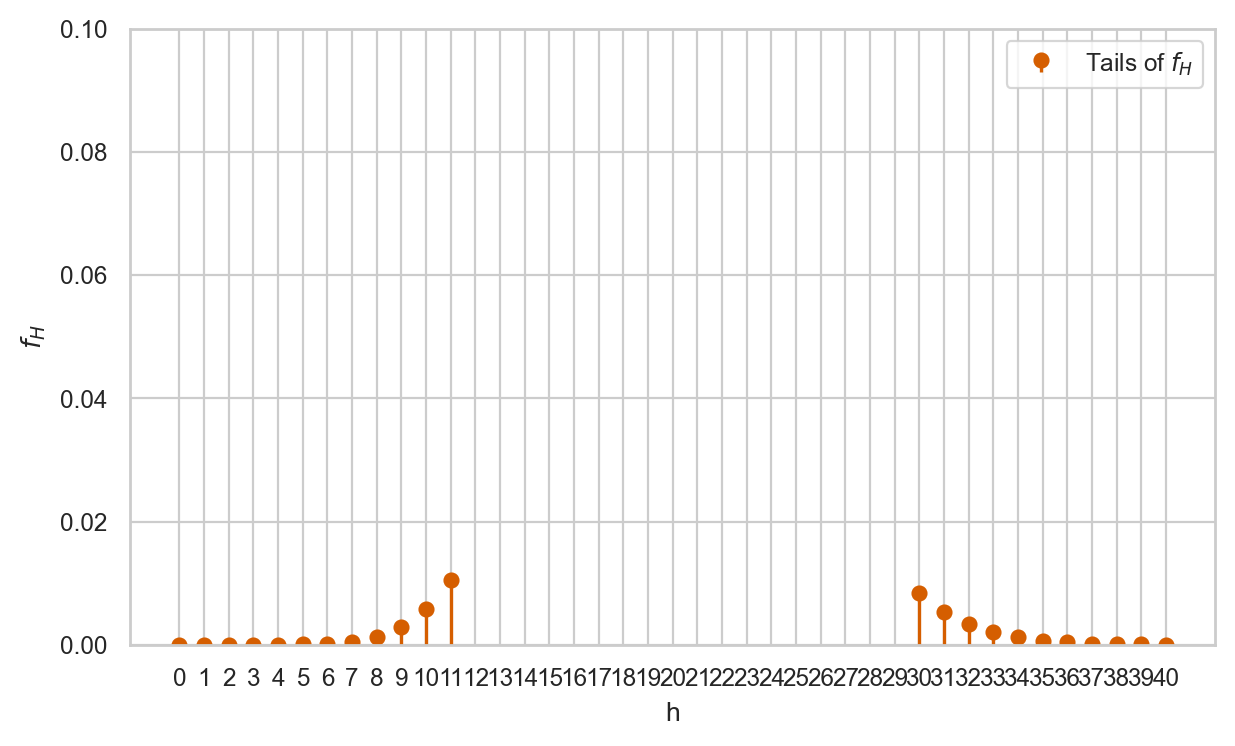

In [67]:
hs = np.arange(0, 40+1)
fHs = rvH.pmf(hs)

# mask the bulk of the distribution
fHs[a:b+1] = np.nan

fig, ax = plt.subplots()
ax.stem(fHs, label="Tails of $f_H$", markerfmt='ro', linefmt='r-', basefmt=" ")
ax.set_xlabel('h')
ax.set_ylabel('$f_H$')
ax.set_ylim([0, 0.1])
ax.legend()
plt.xticks(hs)
print("The tails of the distibution:")

## Frequentist interpretation of probability theory

Recall the random variable $C$ that describes a coin toss.
We can interpret the probability values that the probability mass function $f_C$
assigns to different outcomes in terms of relative frequencies of observed outcomes
in a hypothetical experiment in which we toss the coin many, many times.

Consider a sequence of $n$ observations from a coin toss: $(c_1, c_2, c_3, \ldots, c_n)$.
Each $c_i$ is either `heads` or `tails`.

$$
    \textrm{RelFreq}(\texttt{heads})
    = \frac{ \textrm{count of } c_i = \texttt{heads} }{  n }
    \qquad \textrm{and} \qquad
    \textrm{RelFreq}(\texttt{tails})
    = \frac{ \textrm{count of } c_i = \texttt{tails} }{  n }.
$$

If we generate larger and larger sets of observations,
for example $n=100$, $n=1000$, or $n=10\,000$,
we will observe that the relative frequencies of the two outcomes 
get close to $\frac{1}{2}$ and $\frac{1}{2}$.

![](./attachments/panel_n_coin_flips.png)


So when we say $f_C(\texttt{heads}) = \frac{1}{2}$ and $f_C(\texttt{tails}) = \frac{1}{2}$,
what we are saying is that if were to perform the hypothetical experiment infinitely many times,
we'll observe:
    
$$
    f_C(\texttt{heads})
    = \frac{ \textrm{count of } c_i = \texttt{heads} }{  n }
      \textrm{ as } n \textrm{ goes to infinity}
    = \tfrac{1}{2}.
$$

and

$$
    f_C(\texttt{tails})
    = \frac{ \textrm{count of } c_i = \texttt{tails} }{  n }
      \textrm{ as } n \textrm{ goes to infinity}
    = \tfrac{1}{2}.
$$


## Bayesian interpretation of probability theory

TODO?

state of knowledge